### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

In [34]:
res = 2 ** 0.5
i = 1
for i in range(10000):
    res = 2 ** (res/2)
    i += 1
res
# 直接用数学的解法：a=根号2的a次幂，解方程求得a=2

1.9999999999999998

### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [44]:
import random
class Coin(object):
    def __init__(self, p):
        self.p = p
        
    def flip_is_head(self):
        return random.random() < self.p
    
    def __repr__(self):
        return 'Coin with p = ' + str(self.p)

class Bag_of_coins(object):
    def __init__(self):
        self.coins = []
        
    def add_coins(self, coin):
        self.coins.append(coin)
        
    def pick_random_coin(self):
        return random.choice(self.coins)
        
x = Coin(0.6)
print(x)
bag = Bag_of_coins()
bag.add_coins(Coin(0.4))
bag.add_coins(Coin(0.6))


num_trials = 1000
trial_ctr = 0
head_ctr = 0
while trial_ctr < num_trials:
    coin = bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr += 1
        if coin.flip_is_head():
            head_ctr +=1
head_ctr/trial_ctr

Coin with p = 0.6


0.518

In [45]:
import numpy as np
class Coin(object):
    def __init__(self, p):
        self.prob_heads = p
        
    def flip_is_head(self):
        return np.random.random() < self.prob_heads
    
    def __repr__(self):
        return 'Coin wih p = ' + str(self.prob_heads)
    
class Bag_of_Coins(object):
    def __init__(self):
        self.coins = []
        
    def add_coin(self, coin):
        self.coins.append(coin)
    
    def pick_random_coin(self):
        return np.random.choice(self.coins)
    
bag = Bag_of_Coins()
bag.add_coin(Coin(0.4))
bag.add_coin(Coin(0.6))
bag.pick_random_coin()

num_trials = 10000
trial_ctr = 0 # trial count
head_ctr = 0 # head count
while trial_ctr < num_trials:
    coin = bag.pick_random_coin()
    if coin.flip_is_head():
        trial_ctr += 1
        if coin.flip_is_head():
            head_ctr += 1
head_ctr / trial_ctr

0.519

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [8]:
import Euler as eu
for i in range(500):
    if eu.is_prime(i):
        for j in range(100):
            if 16 * i + 1 == j ** 3:
                print(i)
                print(j)

307
17


### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

Populating the interactive namespace from numpy and matplotlib


2.7185820000000001

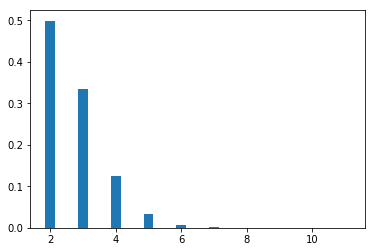

In [24]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

num_trials = 1000000

def sim_num_of_spins_to_exceed_one():
    sum_ = 0
    count = 0
    while sum_ <= 1:
        sum_ += np.random.random()
        count += 1
    return count

# end up with a list of the number of spins on each trial
trials = [sim_num_of_spins_to_exceed_one() for _ in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins = num_bins, normed = True,
         align = 'left', rwidth = 0.3, range = (2, 2 + num_bins))

np.mean(trials)

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

### 3.12
This is based on a Goldman Sachs interview question. You play a game where you toss two fair coins in the air. You always win $1. However, if you have tossed 2 heads at least once, and 2 tails at least once, you surrender all winnings, and cannot play again. You may stop playing at anytime. What’s your strategy?

Populating the interactive namespace from numpy and matplotlib


2.4199000000000002

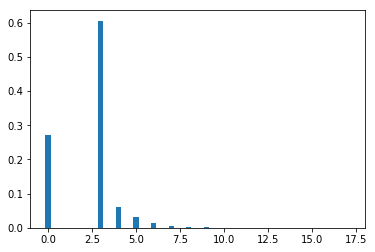

In [15]:
# 1 * 1/4 - x * 1/4 = 0
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

class TwoDiceGame(object):
    def play(self):
        winnings = 0
        two_of_same_seen = False
        while True:
            if two_of_same_seen:
                if winnings >= 3:
                    # our strategy: quit if we have 3+ in this case
                    return winnings
                if np.random.randint(4) == 0:
                    # bad luck: both HH and TT seen, lost it all
                    return 0
            else:
                two_of_same_seen = np.random.randint(2) == 0
            winnings += 1


game = TwoDiceGame()
num_trials = 10000
trials = [game.play() for _ in range(num_trials)]
num_bins = np.max(trials) - np.min(trials) + 1
plt.hist(trials, bins = num_bins, normed = True, align = 'left', rwidth = 0.3, range = (0, num_bins))

np.mean(trials)

### 5.2
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?